In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import numpy as np
import cv2
import os
from pathlib import Path
import cv2 as cv

from fastai.vision import *
import staintools

In [5]:
path = Path('/data/Datasets/WhiteBloodCancer/train/')
fnames = get_image_files(path, recurse=True)


train_regex = re.compile(r'(fold_0|fold_1)')
val_regex = re.compile(r'(fold_2)')

train_paths = [str(fn) for fn in fnames if train_regex.search(str(fn)) is not None]
val_paths = [str(fn) for fn in fnames if val_regex.search(str(fn)) is not None]

In [10]:
def read_image(path):
    im = cv.imread(path)
    return cv.cvtColor(im, cv.COLOR_BGR2RGB)

In [16]:
import matplotlib.pyplot as plt

def show_images(train, val):
    
    fig=plt.figure(figsize=(30, 30))
    
    columns = 2
    rows = len(train)
    
    i = 1
    for train_image, val_image in zip(train, val):
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(train_image)
        
        i += 1
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(val_image)
        
        i += 1
    plt.show()

In [18]:
train_images = [read_image(fn) for fn in train_paths[:5]]
val_images = [read_image(fn) for fn in val_paths[:5]]

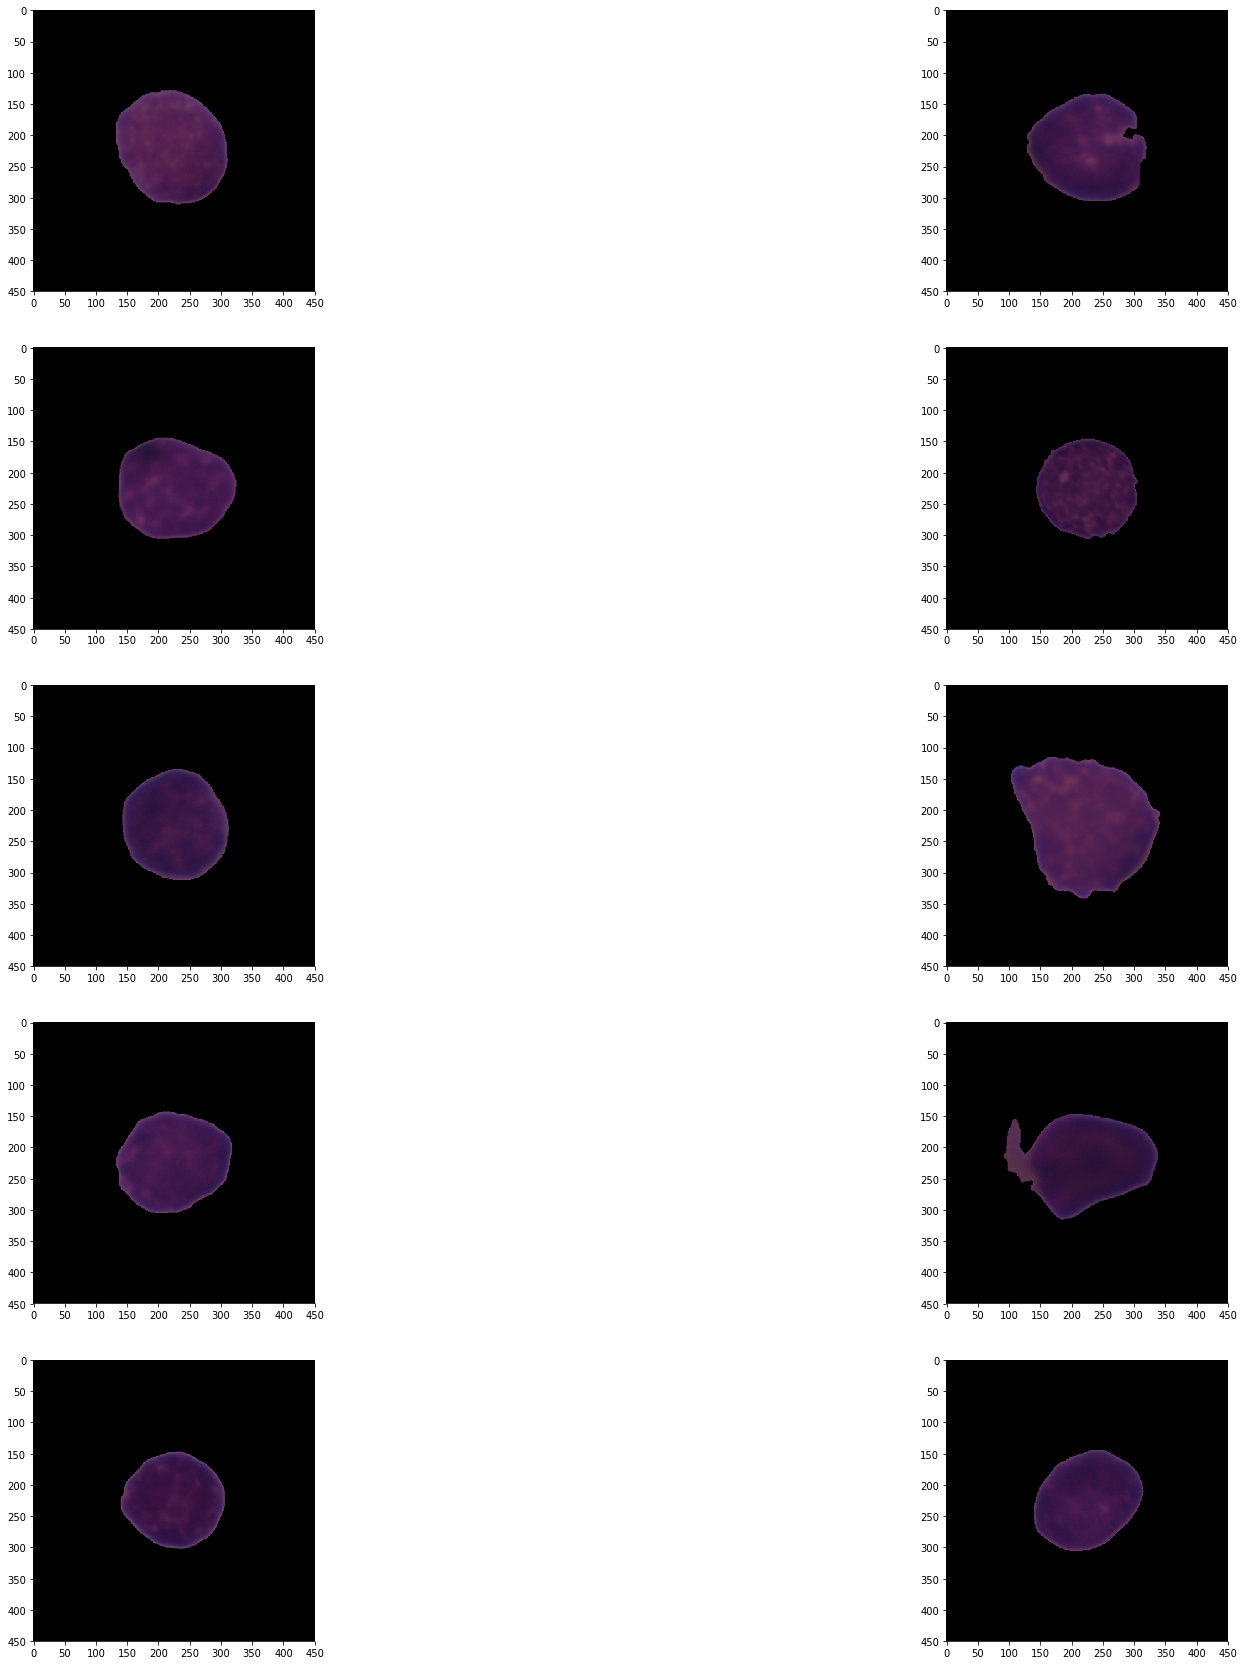

In [19]:
show_images(train_images, val_images)

In [24]:
target = train_images[0]
to_transform = val_images[0]

In [25]:
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)

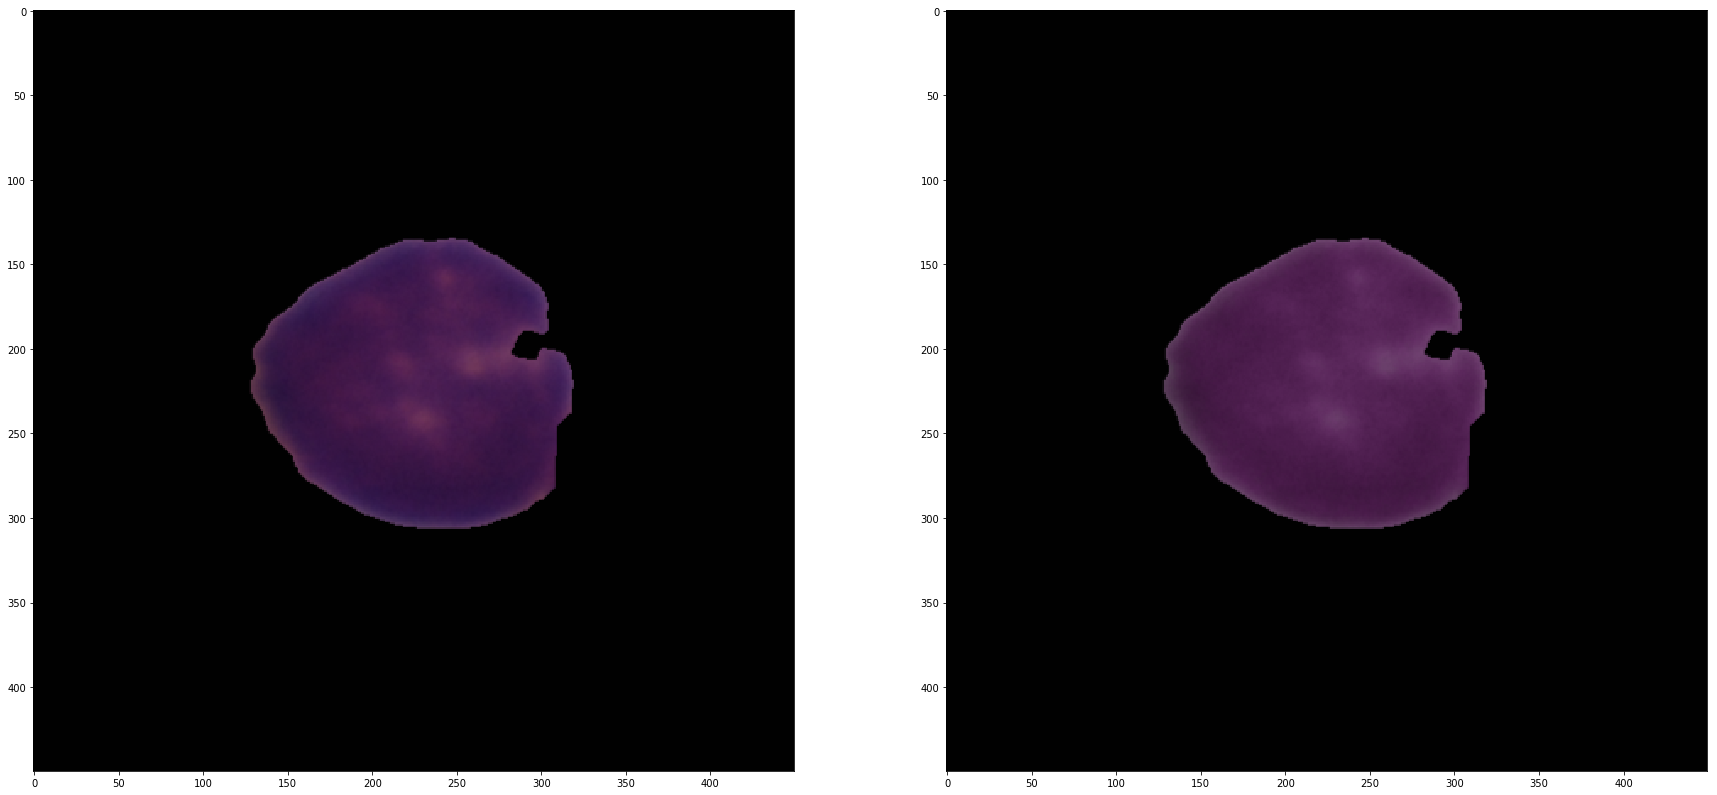

In [26]:
show_images([to_transform], [transformed])

In [29]:
%%time

normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)

transformed_images = []
for train_image in train_images:
    transformed_images.append(normalizer.transform(train_image))

CPU times: user 26.3 s, sys: 1.13 s, total: 27.5 s
Wall time: 7.01 s


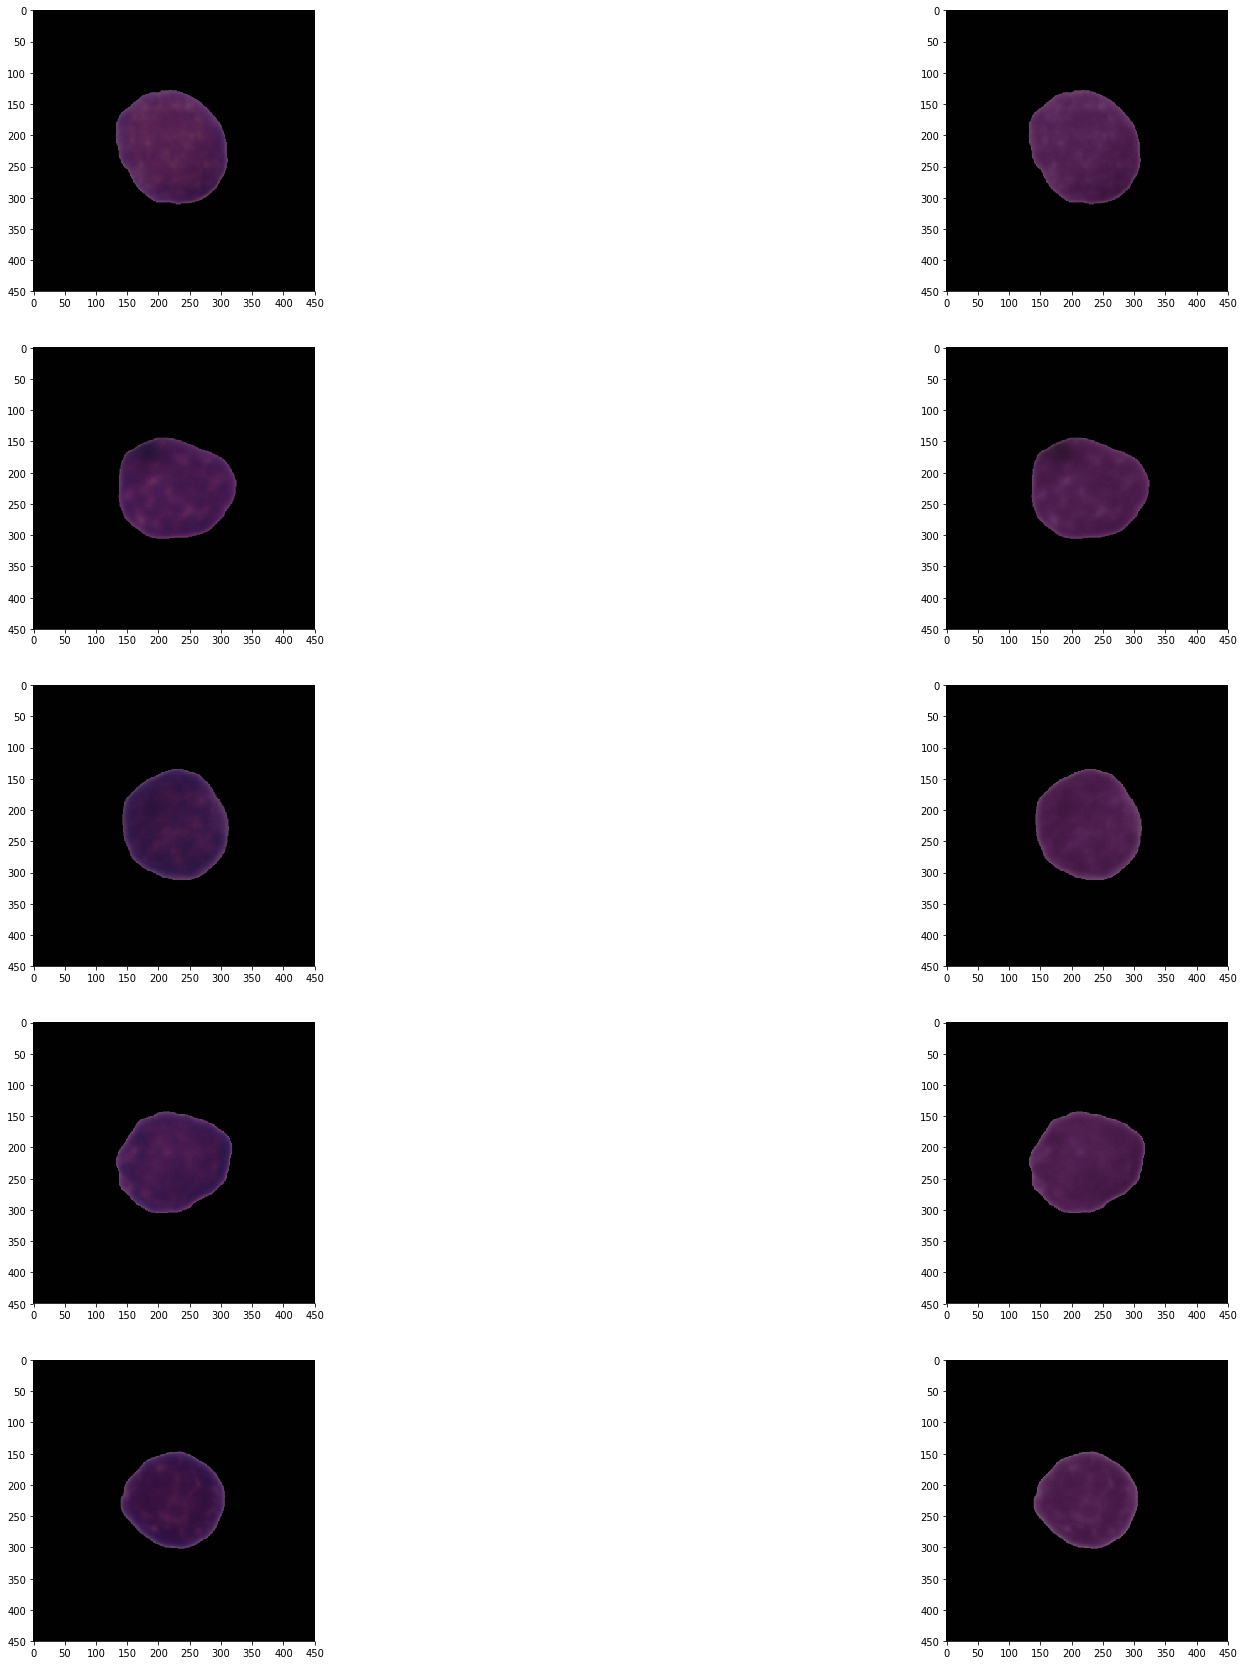

In [30]:
show_images(train_images, transformed_images)